<a href="https://colab.research.google.com/github/carloslme/handson-ml2-book/blob/main/04_Training_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear Regression using the Normal Distribution

More generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the *bias term* (also called the *intercept term*).

***ŷ = θ0 + θ1x1 + θ2x2 + ⋯ + θnxn***

Where:
* ŷ is the predicted value. 
* n is the number of features. 
* xi is the ith feature value. 
* θj is the jth model parameter (including the bias term θ0 and the feature weights θ1, θ2, ⋯, θn).

Or written as vectorized form:

***ŷ=hθ(x)=θ·x***

In this equation:
* θ is the model’s parameter vector, containing the bias term θ0 and the feature weights θ1 to θn.
* x is the instance’s feature vector, containing x0 to xn, with x0 always equal to 1.
* θ·x is the dot product of the vectors θ and x , which is of course equal to θ0x0 + θ1x1 + θ2x2 + ⋯ + θnxn.
* hθ is the hypothesis function, using the model parameters θ.

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


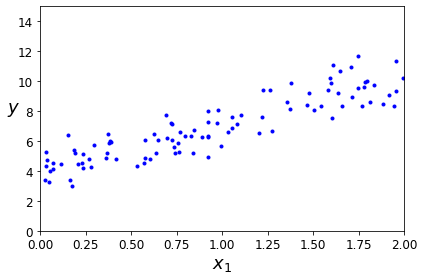

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()